In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
kb = 1.381e-23
T = 310
p_atm = 101300
h = 6.626e-34
na = 6.02e23
m = 32e-3
tau_ev = 0.0267

In [99]:
nq = np.power(2*np.pi*m*kb*T/(na*np.power(h,2)), 1.5)
print(nq)

1.858569462409569e+32


In [100]:
def fugacity(po2):
    return po2*p_atm/(kb*T*nq)

In [101]:
def part(po2):
    g0 = 1
    g1 = 2 * fugacity(po2) * np.exp(0.55/tau_ev)
    g2 = fugacity(po2) * np.exp(1.3/tau_ev)
    return g0 + g1 + g2

In [102]:
def n(po2):
    n1 = 2 * fugacity(po2)*np.exp(0.55/tau_ev) / part(po2)
    n2 = 2 * fugacity(po2)*np.exp(1.3/tau_ev) / part(po2)
    return n1 + n2

In [103]:
pp = np.linspace(0.01, 1, 100000)
no2 = n(pp)/2

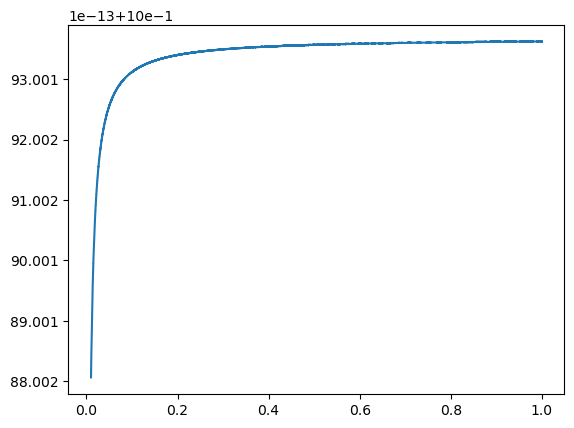

In [105]:
fig = plt.figure()
plt.plot(pp,no2)
plt.show()